## Importowanie danych
Z plików tesktowych importowane są informacje o położeniu miasta.


In [7]:
import HelperFunctions as helper
cities = helper.import_cities('cities.txt')
connections = helper.import_connections('connections.txt')

citiesByIndex = list(cities.values())
cityNamesByIndex = list(cities.keys())

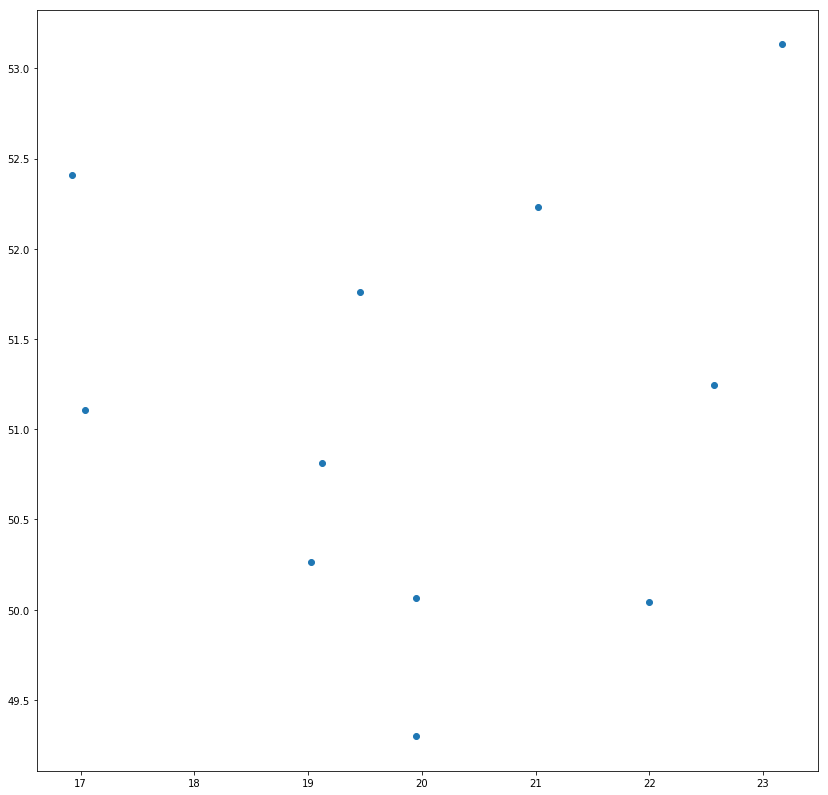

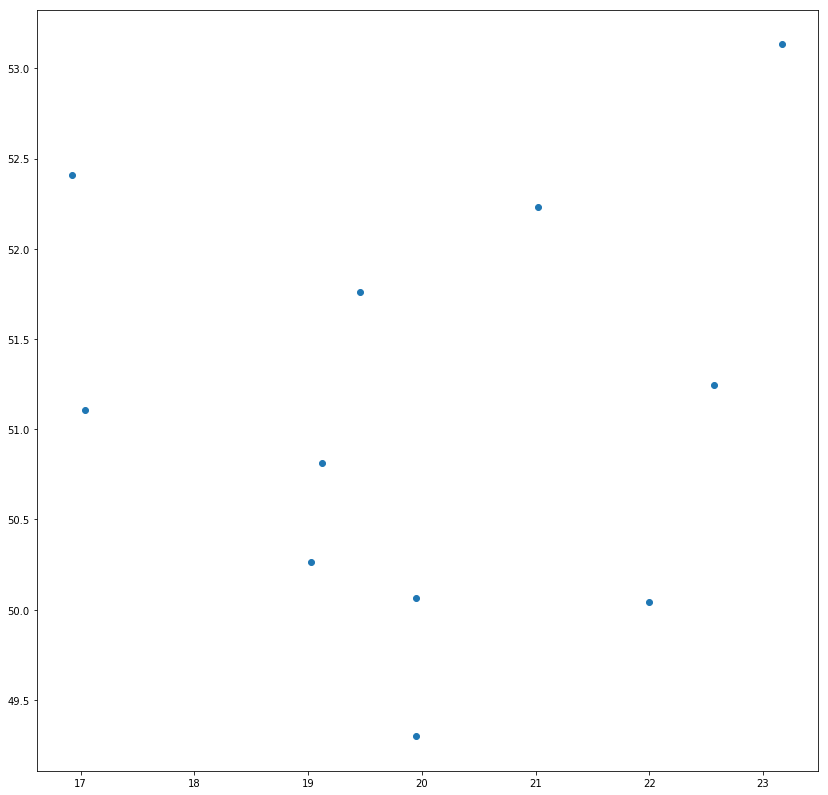

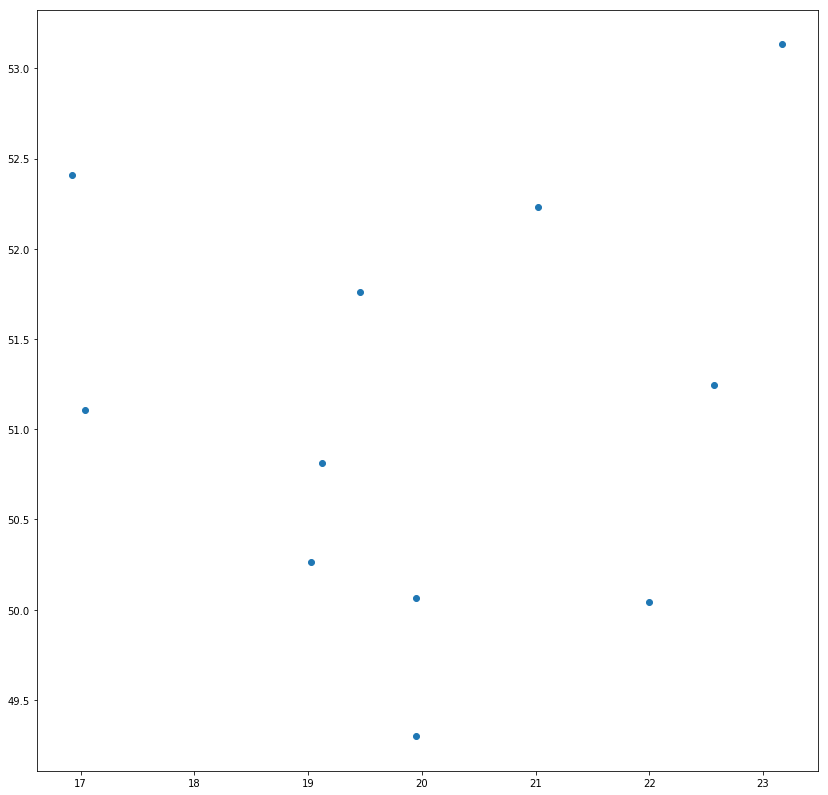

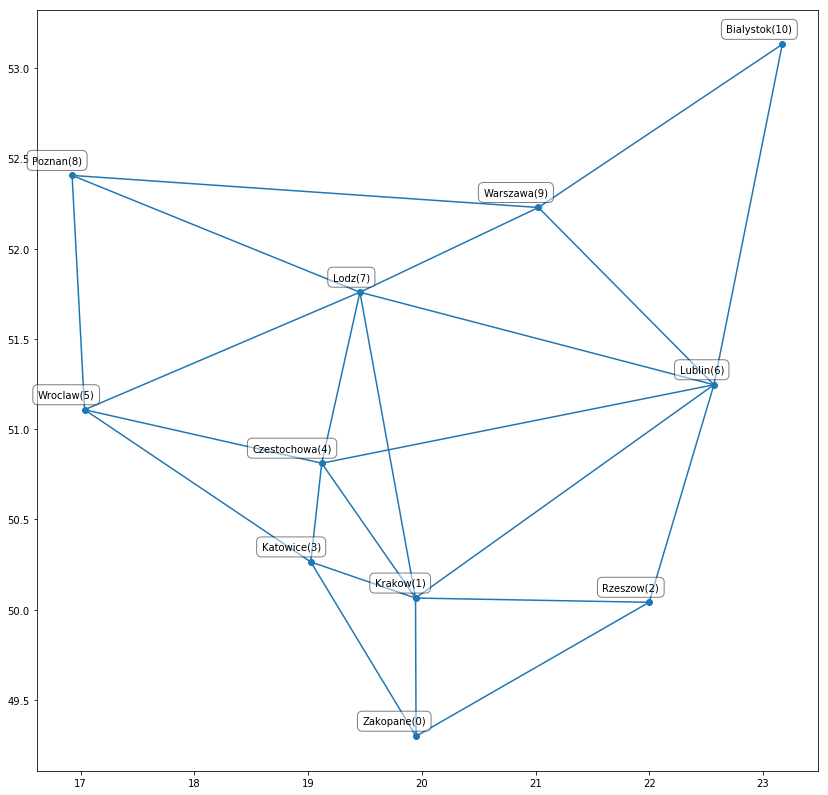

In [10]:
import matplotlib.pyplot as plt

import matplotlib.lines as lines
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize=(14, 14))

(y, x) = zip(*cities.values())
ax.plot(x, y, 'o')

for index, point in enumerate(cities.values()):
    plt.annotate(
        cityNamesByIndex[index] + "(" + str(index) + ")", 
        xy=(point[1], point[0]), 
        xytext=(10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
    )


class MyLine(lines.Line2D):
    def __init__(self, *args, **kwargs):
        # we'll update the position when the line data is set
        self.text = mtext.Text(0, 0, '')
        lines.Line2D.__init__(self, *args, **kwargs)

        # we can't access the label attr until *after* the line is
        # inited
        self.text.set_text(self.get_label())

    def set_figure(self, figure):
        self.text.set_figure(figure)
        lines.Line2D.set_figure(self, figure)

    def set_axes(self, axes):
        self.text.set_axes(axes)
        lines.Line2D.set_axes(self, axes)

    def set_transform(self, transform):
        # 2 pixel offset
        texttrans = transform + mtransforms.Affine2D().translate(2, 2)
        self.text.set_transform(texttrans)
        lines.Line2D.set_transform(self, transform)

    def set_data(self, x, y):
        if len(x):
            self.text.set_position((x[-1], y[-1]))

        lines.Line2D.set_data(self, x, y)

    def draw(self, renderer):
        # draw my label at the end of the line with 2 pixel offset
        lines.Line2D.draw(self, renderer)
        self.text.draw(renderer)


# Rysowanie linii.
for conn, distance in connections.items():
    A, B = conn.split(',')
    A = int(A)
    B = int(B)
    y, x = zip(citiesByIndex[A], citiesByIndex[B])
    # print(x, y)
    line = MyLine(x, y, mfc='red', ms=12)
    line.text.set_color('red')
    line.text.set_fontsize(16)
    ax.add_line(line)

plt.show()

## Stworzenie macierzy sąsiedztwa etc.
Importujemy naszą klasę graph, w której zaimplementowaliśmy tworzenie macierzy sąsiedztwa na podstawie informacji o miastach z plików connections.txt oraz cities.txt.
Funkcje, które importują same pliki do pythona znajdują się w module *HelperFunctions.py*

In [3]:
from Graph import Graph

graph = Graph(connections, cities)
# graph.show_matrix()
graph.create_adjacency_matrix(connections, cities)

Na podstawie stworzonej macierzy sąsiedztwa jesteśmy w stanie przeszukiwać nasz graf metodą BFS (przeszukiwanie w szerz). W naszej implementacji przeszukiwania zwracane są wszystkie możliwe ścieżki do celu jako generator.
Dodatkowo ścieżki generowane są od najkrótszej do najdłuższej, dzięki temu jesteśmy w stanie dostać, najkrótszą ścieżkę (pod względem przeszukanych wierzchołków) wywołujac metodę *next* na generatorze *graph.bfs_paths_adj*.

In [4]:
graph.bfs_adj(0)

# Wszystkie możliwe ścieżki o 0 do 10.
paths = list(graph.bfs_paths_adj(0, 10))
print("Wszystkie możliwe ścieżki pomiędzy 0, a 10 wierzchołkiem. (Wyświetlamy tylko pierwsze 10)")
print(paths[:10])

# Najkrótsza ścieżka.
print("Najkrótsza ścieżka.")
print(paths[0])

# Z racji, że korzystamy z generatora, aby dostać najkrótszą istniejącą ścieżkę możemy wywołać metodę w postaci. (Bez wag)
print("Najkrótsza ścieżka pomiędzy 1, a 10 wierzchołkiem.")
print(next(graph.bfs_paths_adj(1, 10)))

Wszystkie możliwe ścieżki pomiędzy 0, a 10 wierzchołkiem. (Wyświetlamy tylko pierwsze 10)
[[0, 1, 6, 10], [0, 2, 6, 10], [0, 1, 2, 6, 10], [0, 1, 4, 6, 10], [0, 1, 6, 9, 10], [0, 1, 7, 6, 10], [0, 1, 7, 9, 10], [0, 2, 1, 6, 10], [0, 2, 6, 9, 10], [0, 3, 1, 6, 10]]
Najkrótsza ścieżka.
[0, 1, 6, 10]
Najkrótsza ścieżka pomiędzy 1, a 10 wierzchołkiem.
[1, 6, 10]


Dzięki zastosowaniu powyższej implementacji jesteśmy w stanie rozszerzyć nasz algorytm o heurystyczne przeszukiwanie drzewa, czy to stosując strategię przeszukiwania wszerz biorąc pod uwagę wartości heurystyczne takie jak spalanie, czy też odległość w linii prostej od danego węzła, do węzła docelowego.

Dzięki takiej implementacji, bylibyśmy w stanie przeszukiwać graf szybciej (pomijając wierzchołki, które teoretycznie oddalały, by nas od celu.)